## Statistical Inference

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import ttest_ind
from scipy import stats

In [2]:
df_pitcher = pd.read_csv('/Users/christopher/Desktop/Springboard-/df_pitcher_v3.csv')
df_hitter = pd.read_csv('/Users/christopher/Desktop/Springboard-/df_hitter_v3.csv')

### Is there a difference between the salaries paid towards right handed and left handed pitchers?

Null Hypothesis: The salaries for both left and right handed pitchers are the same.

Alternate Hypothesis: The salaries for left and right handed pitcher are different.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

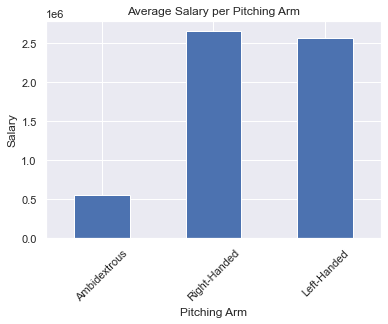

In [3]:
labels = ['Ambidextrous', 'Right-Handed', 'Left-Handed']
positions = (0, 1, 2)

df2 = df_pitcher.groupby(['Throws'])['adj_salary_filled'].mean()
df2.plot.bar()
plt.title('Average Salary per Pitching Arm')
plt.ylabel('Salary')
plt.xlabel('Pitching Arm')
plt.xticks(positions ,labels)
plt.xticks(rotation=45)

In [4]:
# manual t-test 
lefties = df_pitcher.adj_salary_filled[df_pitcher['Throws'] == 'L']
righties = df_pitcher.adj_salary_filled[df_pitcher['Throws'] == 'R']

# alpha level 
alpha= 0.05
N = len(lefties) + len(righties)

#Calculate mean 
lefties_mean = np.mean(lefties)
righties_mean = np.mean(righties)

#Calculate variance
lefties_var = np.var(lefties)
rightes_var = np.var(righties)

#calculate std
std_lefties = np.std(lefties, ddof=1)
std_righties = np.std(righties, ddof=1)
len_lefties, len_righties = len(lefties), len(righties)
std = np.sqrt((((len_righties -1)*(std_righties**2)) + ((len_lefties -1) * (std_lefties**2))) / (N - 2))

#Calculate the t-statistics
t = (righties_mean - lefties_mean)/(std*np.sqrt((1/len_righties + 1/len_lefties)))
df = N - 2

#calculate p value
p_value = 1 - stats.t.cdf(t,df=df)
print(p_value, t)

0.7743908173193755 -0.7534237812415734


In [5]:
# compare samples with t-test from SciPy
ttest,pval = ttest_ind(righties,lefties)
print("p-value",pval, "t-test",ttest)
if pval <0.05:
  print("We reject the null hypothesis.")
else:
  print("We fail to reject the null hypothesis.")

p-value 0.45121836536138527 t-test -0.7534237812413467
We fail to reject the null hypothesis.


### Is there a difference between the salaries paid towards right handed and left handed batters?

Null Hypothesis: The salaries for both left and right handed hitters the same.

Alternate Hypothesis: The salaries for left and right handed hitters are different.

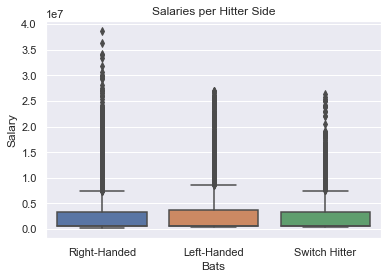

In [6]:
labels = ['Right-Handed', 'Left-Handed', 'Switch Hitter']
positions = (0, 1, 2)
sns.boxplot(x = 'Bats', y = 'adj_salary_filled', data = df_hitter)
sns.set_style("white")
plt.title('Salaries per Hitter Side')
plt.ylabel('Salary')
plt.xticks(positions ,labels)
plt.show()

In [7]:
lefties = df_hitter.adj_salary_filled[df_hitter['Bats'] == 'L']
righties = df_hitter.adj_salary_filled[df_hitter['Bats'] == 'R']


ttest,pval = ttest_ind(lefties,righties)
print("p-value",pval, 'ttest', ttest)
if pval <0.05:
  print("We reject the null hypothesis.")
else:
  print("We fail to reject the null hypothesis.")

p-value 0.17474496847305468 ttest 1.3572755073329725
We fail to reject the null hypothesis.
